In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv('Amazon Sale Report.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(16355, 16)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,fulfilled-by
0,119095,171-0000547-8192359,06/07/22,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,301.0,PIMPRI CHINCHWAD,MAHARASHTRA,412101.0,False,NaN
1,116211,171-0000902-4490745,06/09/22,Cancelled,Amazon,Expedited,Shirt,M,Unshipped,1,544.0,Howrah,WEST BENGAL,711104.0,False,NaN
2,119465,171-0001409-6228339,06/07/22,Shipped,Amazon,Expedited,Shirt,XS,Shipped,1,422.0,KODAD,TELANGANA,508206.0,False,NaN
3,84704,171-0003082-5110755,05/04/22,Shipped,Amazon,Expedited,T-shirt,L,Shipped,1,563.0,GREATER NOIDA,UTTAR PRADESH,201306.0,False,NaN
4,45437,171-0003738-2052324,04/03/22,Shipped,Amazon,Expedited,Shirt,XS,Shipped,1,379.0,FIROZABAD,UTTAR PRADESH,283203.0,False,NaN


In [6]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,16355.000000,16355.000000,15376.000000,16351.000000
mean,64405.832406,0.901987,663.680064,465302.510366
std,37194.022176,0.309434,265.779123,192443.435911
min,1.000000,0.000000,229.000000,110001.000000
25%,32521.500000,1.000000,459.000000,380059.500000
50%,64628.000000,1.000000,625.000000,500035.000000
75%,96144.500000,1.000000,788.000000,600041.000000
max,128961.000000,3.000000,2655.000000,855113.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16355 entries, 0 to 16354
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16355 non-null  int64  
 1   Order ID            16355 non-null  object 
 2   Date                16355 non-null  object 
 3   Status              16355 non-null  object 
 4   Fulfilment          16355 non-null  object 
 5   ship-service-level  16355 non-null  object 
 6   Category            16355 non-null  object 
 7   Size                16355 non-null  object 
 8   Courier Status      16355 non-null  object 
 9   Qty                 16355 non-null  int64  
 10  Amount              15376 non-null  float64
 11  ship-city           16351 non-null  object 
 12  ship-state          16351 non-null  object 
 13  ship-postal-code    16351 non-null  float64
 14  B2B                 16355 non-null  bool   
 15  fulfilled-by        5031 non-null   object 
dtypes: b

In [8]:
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
Amount                  979
ship-city                 4
ship-state                4
ship-postal-code          4
B2B                       0
fulfilled-by          11324
dtype: int64

In [9]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B',
       'fulfilled-by'],
      dtype='object')

In [10]:
df[['Amount', 'Qty']].describe()

,Amount,Qty
count,15376.000000,16355.000000
mean,663.680064,0.901987
std,265.779123,0.309434
min,229.000000,0.000000
25%,459.000000,1.000000
50%,625.000000,1.000000
75%,788.000000,1.000000
max,2655.000000,3.000000


Exploratory Data Analysis

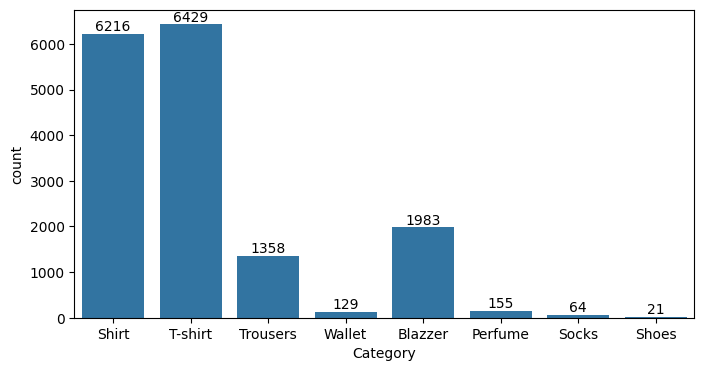

In [11]:
# plotting a bar chart 
plt.figure(figsize= ( 8,4))
ax = sns.countplot(x = 'Category',data = df)
ax.bar_label(ax.containers[0])
plt.show()
# for bars in ax.containers:
#     ax.bar_label(bars)

/var/folders/vc/m7tcsp712p5bmdb07fsh0xrh0000gn/T/ipykernel_1105/1251596285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ship-city', data = df_top_5,palette='Paired')


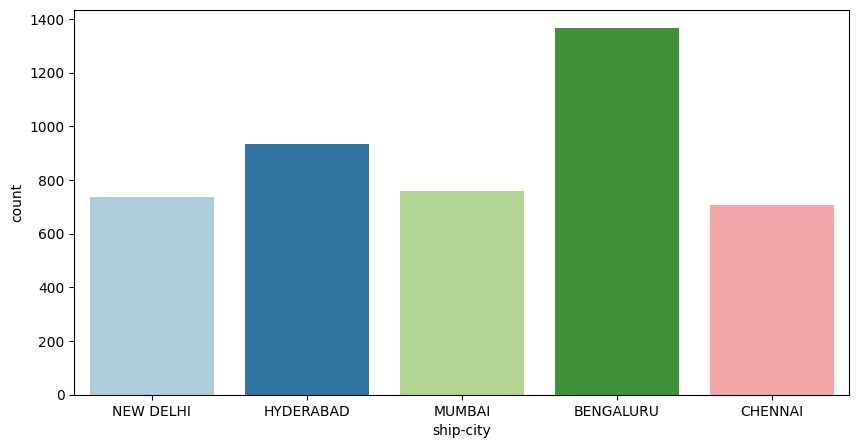

In [12]:
# plotting a bar chart 
plt.figure(figsize= (10,5))
# Get the top 5 'Ship-city' by count
top_5_city = df['ship-city'].value_counts().head(5).index
# Filter the DataFrame to include only the top 5 'Ship-State'
df_top_5 = df[df['ship-city'].isin(top_5_city)]
# Create the count plot
ax = sns.countplot(x='ship-city', data = df_top_5,palette='Paired')
# ax.bar_label(ax.containers[0])
plt.show()
# Add labels to the bars
# for bars in ax.containers:
#     ax.bar_label(bars)

/var/folders/vc/m7tcsp712p5bmdb07fsh0xrh0000gn/T/ipykernel_1105/2575956615.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ship-state', data=df_top_5,palette='Paired')


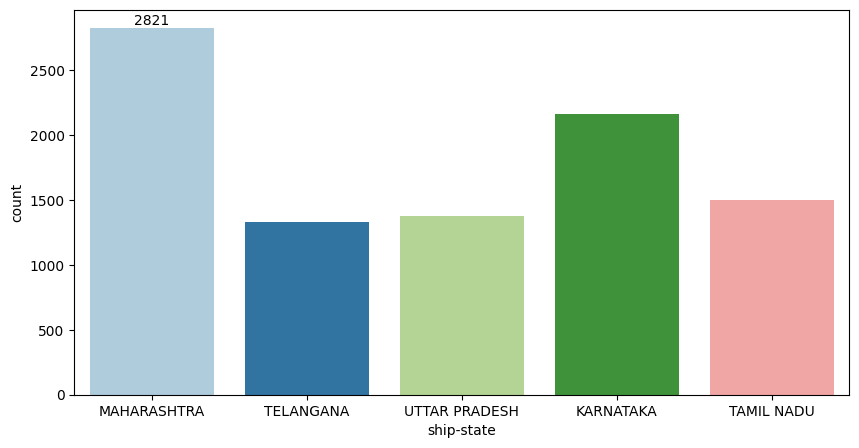

In [13]:
# plotting a bar chart 
plt.figure(figsize= (10,5))
# Get the top 5 'Ship-State' by count
top_5_states = df['ship-state'].value_counts().head(5).index
# Filter the DataFrame to include only the top 5 'Ship-State'
df_top_5 = df[df['ship-state'].isin(top_5_states)]
# Create the count plot
ax = sns.countplot(x='ship-state', data=df_top_5,palette='Paired')
ax.bar_label(ax.containers[0])
plt.show()
# Add labels to the bars
# for bars in ax.containers:
#     ax.bar_label(bars)

          Size
Category      
Blazzer   1983
Perfume    155
Shirt     6216
Shoes       21
Socks       64
T-shirt   6429
Trousers  1358
Wallet     129


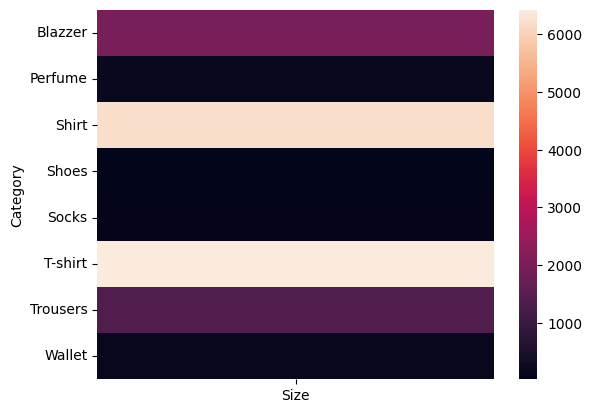

In [14]:
gb = df.groupby("Category").agg({"Size":'count'})
print(gb)
sns.heatmap(gb)
plt.show()

Size      3XL  4XL  5XL  6XL  Free     L     M    S    XL   XS  XXL
Category                                                           
Blazzer   284    0    0    0     0   337   327  276   302  177  280
Perfume     0    0    0    0   155     0     0    0     0    0    0
Shirt     745   49   65   90     0  1140  1021  760  1009  411  926
Shoes       0    0    0    0    21     0     0    0     0    0    0
Socks       9    0    0    0     0     7     8   10     8    7   15
T-shirt   738    3    5    5     0  1063  1230  942   932  726  785
Trousers  142    0    0    0     0   237   237  143   266  118  215
Wallet      0    0    0    0   129     0     0    0     0    0    0


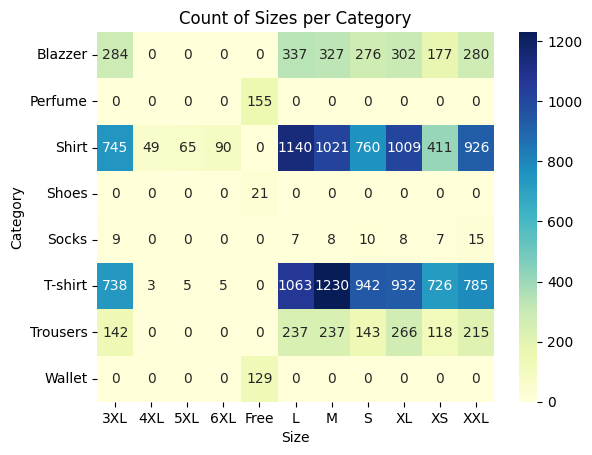

In [15]:
pivot = df.pivot_table(index='Category', columns='Size', aggfunc='size', fill_value=0)
# Print pivot table
print(pivot)
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Count of Sizes per Category")
plt.show()

In [16]:
df[["Status"]].describe()

,Status
count,16355
unique,11
top,Shipped
freq,9789


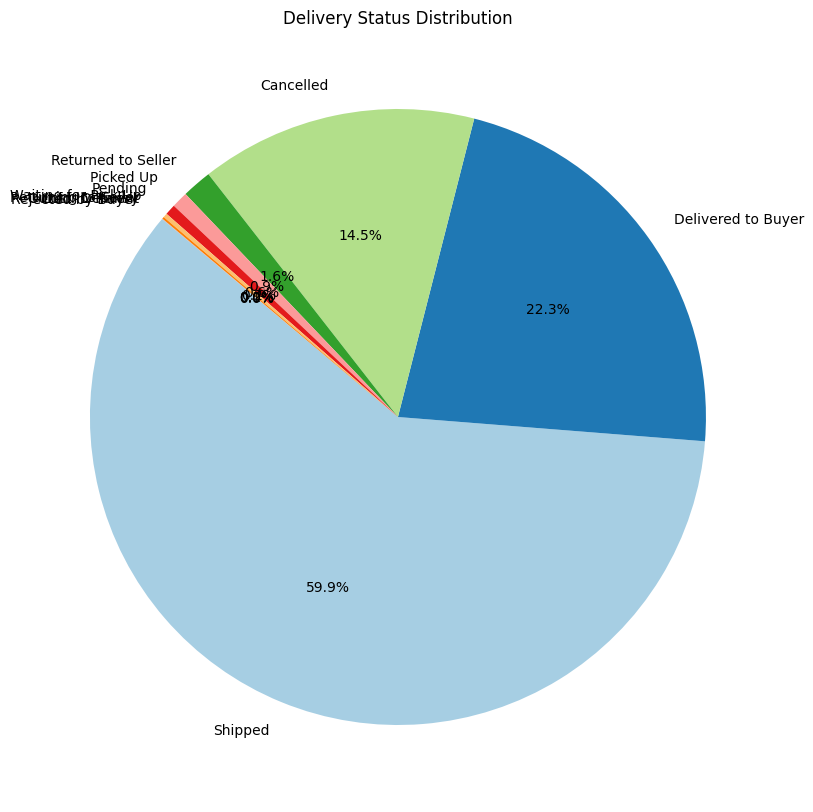

In [17]:
delivery_status_counts = df['Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired'))
plt.title('Delivery Status Distribution')
plt.show()

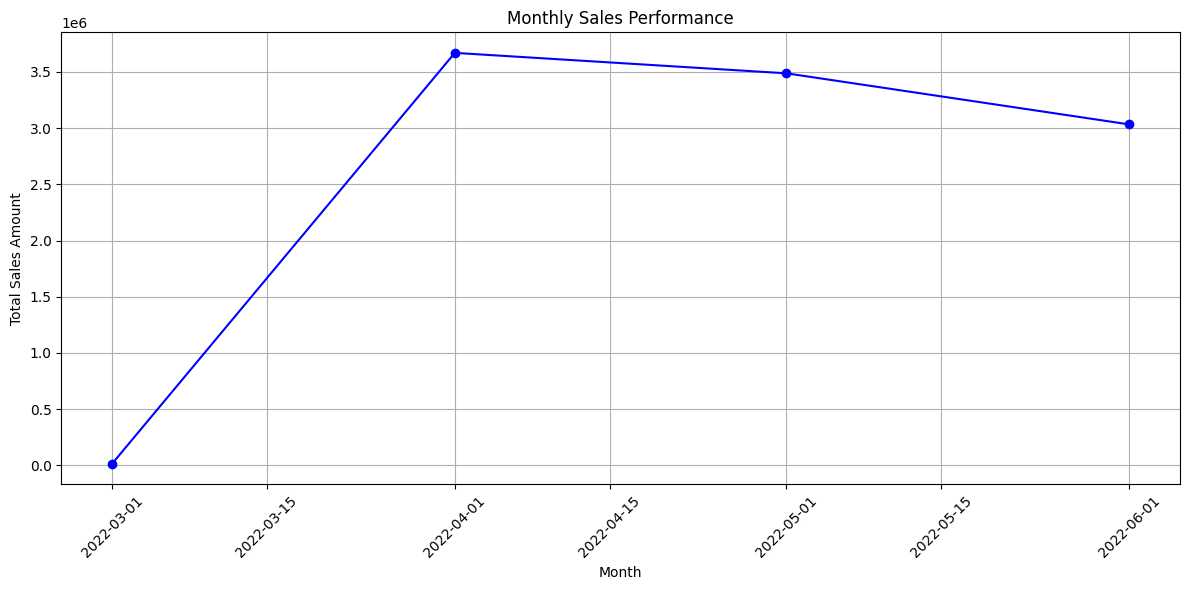

In [19]:
# Function to parse dates with multiple formats
def parse_dates(date):
    for fmt in ('%m/%d/%y', '%m-%d-%y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    return pd.NaT

# Apply the function to the Date column
df['Date'] = df['Date'].apply(parse_dates)

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Extract the month and year from the Date column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the data by YearMonth and sum the Amount
monthly_sales = df.groupby('YearMonth')['Amount'].sum().reset_index()

# Convert YearMonth to datetime for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Amount'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df[["Fulfilment"]].describe()

,Fulfilment
count,16355
unique,2
top,Amazon
freq,11324


In [22]:
gb = df.groupby("Fulfilment").agg({"Size":'count'})
print(gb)


             Size
Fulfilment       
Amazon      11324
Merchant     5031


Courier Status  Cancelled  On the Way  Shipped  Unshipped
Fulfilment                                               
Amazon                751           0     9785        788
Merchant                0         907     4058         66


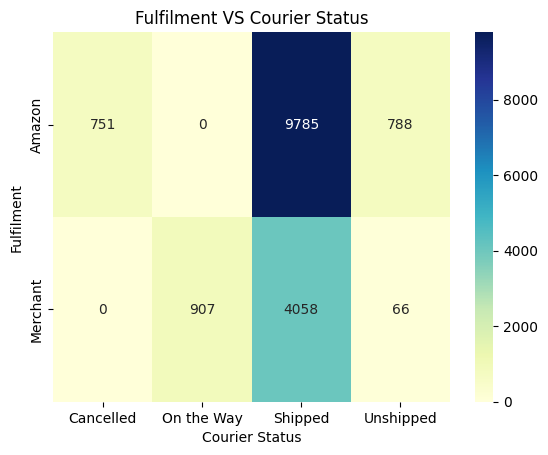

In [24]:
pivot = df.pivot_table(index='Fulfilment', columns='Courier Status', aggfunc='size', fill_value=0)
# Print pivot table
print(pivot)
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Fulfilment VS Courier Status")
plt.show()